In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as ss
from scipy.stats import f_oneway
from itertools import product

c:\Users\hp\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Analyse Exploratoire des données

In [3]:
#Lecture des données
df = pd.read_csv("data/exercice_data.csv", delimiter=",", index_col = 0, encoding="ISO-8859-1")
df.head()


,FirstName,FamilyName,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
StudentID,,,,,,,,,,,,,,,,,,,,,
0,Rafael,Morais,F,18,U,GT3,A,4,4,at_home,...,no,no,4,3,4,1,1,3,6,6
1,Lara,Braga,F,17,U,GT3,T,1,1,at_home,...,yes,no,5,3,3,1,1,3,4,6
2,Gonçalo,Azevedo,F,15,U,LE3,T,1,1,at_home,...,yes,no,4,3,2,2,3,3,10,10
3,Lara,Perna,F,15,U,GT3,T,4,2,health,...,yes,yes,3,2,2,1,1,5,2,15
4,João,Pires,F,16,U,GT3,T,3,3,other,...,no,no,4,3,2,1,2,5,4,10


In [4]:
#Taille du dataset
df.shape

(357, 32)

In [5]:
#Pourcentage de valeurs manquantes
((df.isna().sum()/df.shape[0]).sort_values(ascending=False))*100

FirstName     0.0
FamilyName    0.0
absences      0.0
health        0.0
Walc          0.0
Dalc          0.0
goout         0.0
freetime      0.0
famrel        0.0
romantic      0.0
internet      0.0
higher        0.0
nursery       0.0
activities    0.0
paid          0.0
famsup        0.0
schoolsup     0.0
failures      0.0
studytime     0.0
traveltime    0.0
guardian      0.0
reason        0.0
Fjob          0.0
Mjob          0.0
Fedu          0.0
Medu          0.0
Pstatus       0.0
famsize       0.0
address       0.0
age           0.0
sex           0.0
FinalGrade    0.0
dtype: float64

In [6]:
#Statistiques descriptives
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,16.655462,2.795518,2.546218,1.431373,2.042017,0.271709,3.955182,3.246499,3.098039,1.495798,2.330532,3.549020,6.316527,11.523810
std,1.268262,1.093999,1.084217,0.686075,0.831895,0.671750,0.885721,1.011601,1.090779,0.919886,1.294974,1.402638,8.187623,3.227797
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,9.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


In [7]:
#Types de données
df.dtypes

FirstName     object
FamilyName    object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
FinalGrade     int64
dtype: object

In [8]:
df.drop(columns = ['FirstName', 'FamilyName'], inplace= True)

In [9]:
#Variables numériques et catégorielles
numeric_columns = df.select_dtypes(include=['int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

### Relations Numeric/Numeric

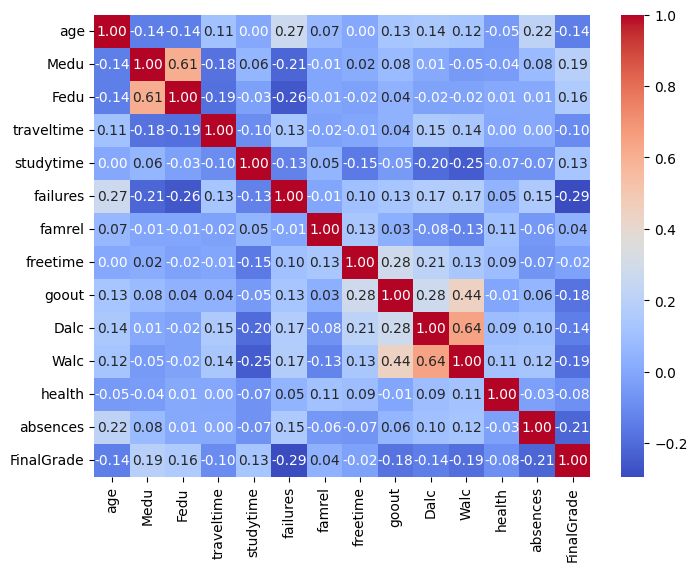

In [10]:
#Corrélation entre les variables numériques et la note finale
import seaborn as sns
plt.figure(figsize=(8, 6)) 

df_numerical_variables = df[numeric_columns]
sns.heatmap(df_numerical_variables.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

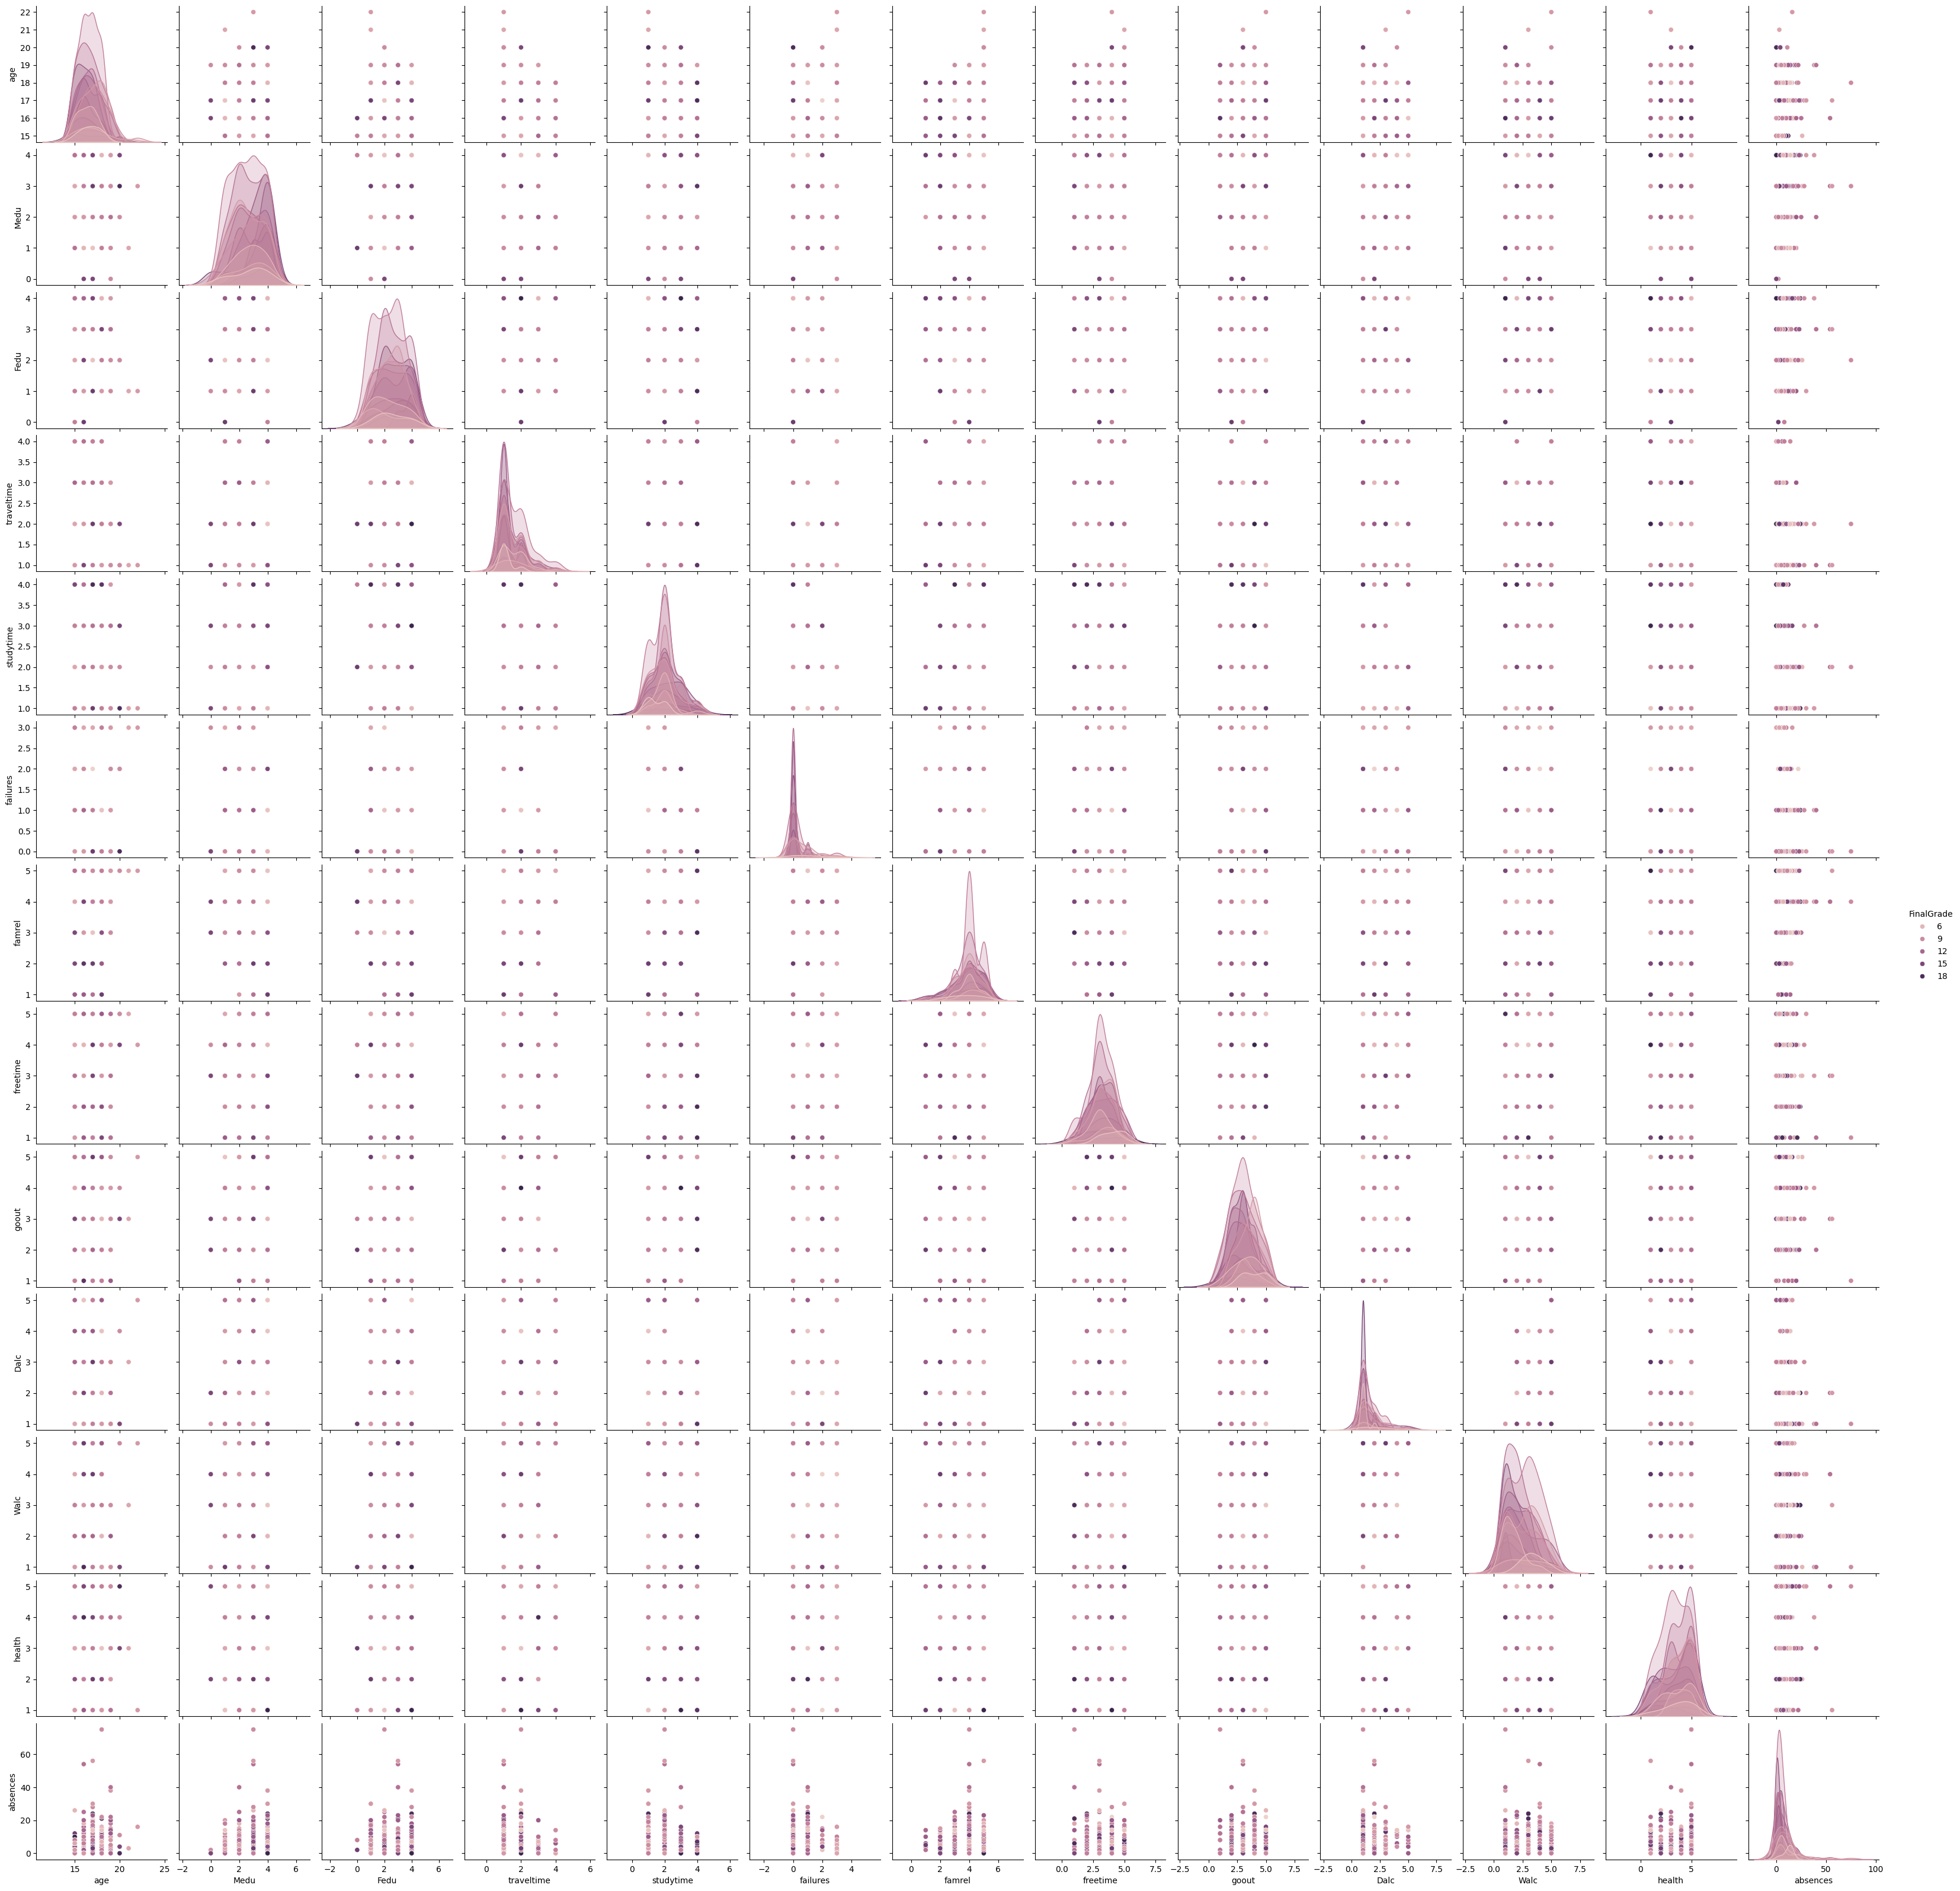

In [21]:
sns.pairplot(df_numerical_variables, hue='FinalGrade')

### Relations Catégorielles/ Catégorielles - Ctégorielles/Note finale

In [11]:
categorical_columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
       'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic'],
      dtype='object')

In [12]:
#Dictionnaire Correspondance catégorie-chiffre
correpondance_category_numéro = {}
df_ = df.copy()
for col in categorical_columns:
    df_[col] = df_[col].astype('category')
    df_[f"{col}_encoded"] = df_[col].cat.codes  # Ajouter une nouvelle colonne encodée
    correpondance_category_numéro[col] = dict(enumerate(df_[col].cat.categories))
print(correpondance_category_numéro)

{'sex': {0: 'F', 1: 'M'}, 'address': {0: 'R', 1: 'U'}, 'famsize': {0: 'GT3', 1: 'LE3'}, 'Pstatus': {0: 'A', 1: 'T'}, 'Mjob': {0: 'at_home', 1: 'health', 2: 'other', 3: 'services', 4: 'teacher'}, 'Fjob': {0: 'at_home', 1: 'health', 2: 'other', 3: 'services', 4: 'teacher'}, 'reason': {0: 'course', 1: 'home', 2: 'other', 3: 'reputation'}, 'guardian': {0: 'father', 1: 'mother', 2: 'other'}, 'schoolsup': {0: 'no', 1: 'yes'}, 'famsup': {0: 'no', 1: 'yes'}, 'paid': {0: 'no', 1: 'yes'}, 'activities': {0: 'no', 1: 'yes'}, 'nursery': {0: 'no', 1: 'yes'}, 'higher': {0: 'no', 1: 'yes'}, 'internet': {0: 'no', 1: 'yes'}, 'romantic': {0: 'no', 1: 'yes'}}


In [13]:
for col in categorical_columns:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes
df.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
StudentID,,,,,,,,,,,,,,,,,,,,,
0,0,18,1,0,0,4,4,0,4,0,...,0,0,4,3,4,1,1,3,6,6
1,0,17,1,0,1,1,1,0,2,0,...,1,0,5,3,3,1,1,3,4,6
2,0,15,1,1,1,1,1,0,2,2,...,1,0,4,3,2,2,3,3,10,10
3,0,15,1,0,1,4,2,1,3,1,...,1,1,3,2,2,1,1,5,2,15
4,0,16,1,0,1,3,3,2,2,1,...,0,0,4,3,2,1,2,5,4,10


In [14]:
#Categorical/Categorical --- Test de khi2
list1 = categorical_columns
list2 = categorical_columns
combinations = list(product(list1,list2, repeat = 1))
print(combinations)

[('sex', 'sex'), ('sex', 'address'), ('sex', 'famsize'), ('sex', 'Pstatus'), ('sex', 'Mjob'), ('sex', 'Fjob'), ('sex', 'reason'), ('sex', 'guardian'), ('sex', 'schoolsup'), ('sex', 'famsup'), ('sex', 'paid'), ('sex', 'activities'), ('sex', 'nursery'), ('sex', 'higher'), ('sex', 'internet'), ('sex', 'romantic'), ('address', 'sex'), ('address', 'address'), ('address', 'famsize'), ('address', 'Pstatus'), ('address', 'Mjob'), ('address', 'Fjob'), ('address', 'reason'), ('address', 'guardian'), ('address', 'schoolsup'), ('address', 'famsup'), ('address', 'paid'), ('address', 'activities'), ('address', 'nursery'), ('address', 'higher'), ('address', 'internet'), ('address', 'romantic'), ('famsize', 'sex'), ('famsize', 'address'), ('famsize', 'famsize'), ('famsize', 'Pstatus'), ('famsize', 'Mjob'), ('famsize', 'Fjob'), ('famsize', 'reason'), ('famsize', 'guardian'), ('famsize', 'schoolsup'), ('famsize', 'famsup'), ('famsize', 'paid'), ('famsize', 'activities'), ('famsize', 'nursery'), ('famsiz

In [15]:
result = []
for couple in combinations:
    if couple[0] != couple[1]:
        result.append((couple[0],couple[1],list(ss.chi2_contingency(pd.crosstab(df[couple[0]], df[couple[1]])))[1]))
        
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'p_value'])
chi_test_output.pivot(index='var1', columns='var2', values='p_value')

var2,Fjob,Mjob,Pstatus,activities,address,famsize,famsup,guardian,higher,internet,nursery,paid,reason,romantic,schoolsup,sex
var1,,,,,,,,,,,,,,,,
Fjob,NaN,3.080321e-08,0.397071,0.533422,0.654838,0.414539,2.648394e-01,0.099053,0.121356,0.381869,0.421206,6.922342e-01,0.260838,0.942781,0.214368,0.329827
Mjob,3.080321e-08,NaN,0.364310,0.123542,0.023919,0.527139,6.853765e-02,0.036800,0.014616,0.000110,0.065987,9.893232e-03,0.032645,0.542142,0.077867,0.006430
Pstatus,3.970713e-01,3.643102e-01,NaN,0.079722,0.675059,0.003820,6.197043e-01,0.053221,0.979490,0.145612,0.070426,4.153666e-01,0.927798,0.643767,0.611897,0.921582
activities,5.334224e-01,1.235417e-01,0.079722,NaN,0.185176,0.737675,6.511883e-01,0.344721,0.395275,0.282683,0.542189,8.776388e-01,0.038816,0.643382,0.315628,0.012595
address,6.548383e-01,2.391873e-02,0.675059,0.185176,NaN,0.278269,9.269157e-01,0.486474,0.770969,0.000170,0.109521,5.558467e-01,0.123213,1.000000,0.875545,0.813535
famsize,4.145390e-01,5.271388e-01,0.003820,0.737675,0.278269,NaN,2.228180e-01,0.628497,1.000000,1.000000,0.024340,7.547220e-01,0.947288,0.630619,0.620843,0.169061
famsup,2.648394e-01,6.853765e-02,0.619704,0.651188,0.926916,0.222818,NaN,0.982732,0.083777,0.229332,0.405557,3.425045e-08,0.172381,0.961537,0.067986,0.004648
guardian,9.905337e-02,3.679994e-02,0.053221,0.344721,0.486474,0.628497,9.827319e-01,NaN,0.624336,0.647994,0.044726,4.031816e-01,0.643424,0.146237,0.545834,0.654911
higher,1.213560e-01,1.461649e-02,0.979490,0.395275,0.770969,1.000000,8.377701e-02,0.624336,NaN,0.365021,0.063587,3.938806e-03,0.001245,0.515050,0.717336,0.040463


In [16]:
#Fjob : Mjob 
#Mjob : Fjob adress guardian higher internet paid reason sex
#Pstatus: famsizse
#activities: sex
#Famsize: pstatus nursery
#famsup: paid sex
#guardian: Mjob nursery 
#higher: Mjob paid reason sex
#Internet: Mjob address paid
#nursery: famsize guardian 
#paid: Mjob famsup higher internet reson sex
#reason: Mjob activities higher paid
#romantic: none
#sex: Mjob activities famsup higher paid schoolsup

In [17]:
#Categorical/Numeric --- Test Anova
from scipy.stats import f_oneway

significant_anova_results = {}

for var in categorical_columns:
    groups = [df[df[var] == category]['FinalGrade'] for category in df[var].unique()]
    anova_stat, p_value = f_oneway(*groups)
    if p_value < 0.05:
        significant_anova_results[var] = {'ANOVA F-statistic': anova_stat, 'p-value': p_value}

# Display only significant results
for var, result in significant_anova_results.items():
    print(f"Significant ANOVA result for {var} with FinalGrade:")
    print(f"  F-statistic: {result['ANOVA F-statistic']:.4f}")
    print(f"  p-value: {result['p-value']:.4f}\n")

Significant ANOVA result for address with FinalGrade:
  F-statistic: 6.1112
  p-value: 0.0139

Significant ANOVA result for Mjob with FinalGrade:
  F-statistic: 4.2504
  p-value: 0.0023

Significant ANOVA result for Fjob with FinalGrade:
  F-statistic: 2.4743
  p-value: 0.0442

Significant ANOVA result for schoolsup with FinalGrade:
  F-statistic: 21.3854
  p-value: 0.0000

Significant ANOVA result for higher with FinalGrade:
  F-statistic: 4.6261
  p-value: 0.0322

Significant ANOVA result for internet with FinalGrade:
  F-statistic: 4.4791
  p-value: 0.0350



## Supression des variables corrélées

In [18]:
df_new = df.copy()
df_new = df.drop(columns = ['Fedu', 'Mjob', 'Walc'])

In [19]:
df_new.head()

,sex,age,address,famsize,Pstatus,Medu,Fjob,reason,guardian,traveltime,...,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences,FinalGrade
StudentID,,,,,,,,,,,,,,,,,,,,,
0,0,18,1,0,0,4,4,0,1,2,...,1,0,0,4,3,4,1,3,6,6
1,0,17,1,0,1,1,2,0,0,1,...,1,1,0,5,3,3,1,3,4,6
2,0,15,1,1,1,1,2,2,1,1,...,1,1,0,4,3,2,2,3,10,10
3,0,15,1,0,1,4,3,1,1,1,...,1,1,1,3,2,2,1,5,2,15
4,0,16,1,0,1,3,2,1,0,1,...,1,0,0,4,3,2,1,5,4,10


## Clustering

In [20]:
scaler = StandardScaler()
columns = df_new.columns
X = df_new[columns]
X_scaled = scaler.fit_transform(X)

In [21]:
X_scaled

array([[-0.96422494,  1.06162997,  0.52874369, ..., -0.39196864,
        -0.03871342, -1.71372684],
       [-0.96422494,  0.27204268,  0.52874369, ..., -0.39196864,
        -0.28332739, -1.71372684],
       [-0.96422494, -1.30713191,  0.52874369, ..., -0.39196864,
         0.45051454, -0.47275223],
       ...,
       [ 1.0371024 ,  3.43039185, -1.89127552, ..., -0.39196864,
        -0.40563438, -1.40348319],
       [ 1.0371024 ,  1.06162997, -1.89127552, ...,  1.03591713,
        -0.77255535, -0.47275223],
       [ 1.0371024 ,  1.85121727,  0.52874369, ...,  1.03591713,
        -0.16102041, -0.78299588]])

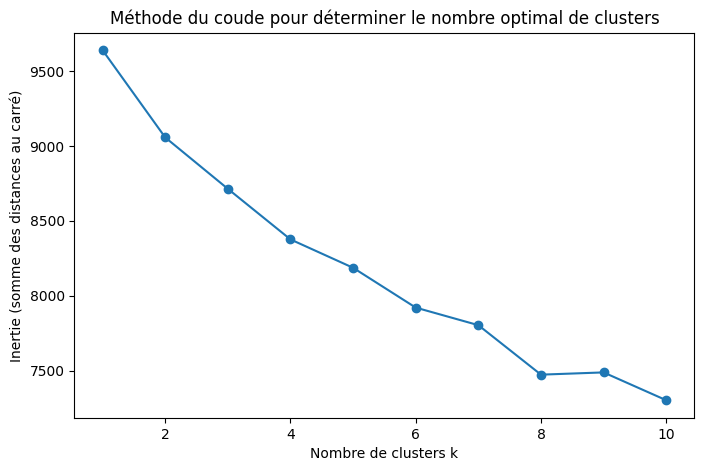

In [22]:
# Calculer l'inertie pour différents nombres de clusters
inertias = []
K_range = range(1, 11)  # Tester de 1 à 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Tracer le graphe de la règle du coude
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Nombre de clusters k')
plt.ylabel("Inertie (somme des distances au carré)")
plt.title("Méthode du coude pour déterminer le nombre optimal de clusters")
plt.show()

In [40]:
# Étape 2 : Appliquer le clustering
kmeans = KMeans(n_clusters=6)  # Ajuste le nombre de clusters selon tes besoins
df_new['cluster'] = kmeans.fit_predict(X_scaled)


In [41]:
df_new

,sex,age,address,famsize,Pstatus,Medu,Fjob,reason,guardian,traveltime,...,internet,romantic,famrel,freetime,goout,Dalc,health,absences,FinalGrade,cluster
StudentID,,,,,,,,,,,,,,,,,,,,,
0,0,18,1,0,0,4,4,0,1,2,...,0,0,4,3,4,1,3,6,6,1
1,0,17,1,0,1,1,2,0,0,1,...,1,0,5,3,3,1,3,4,6,2
2,0,15,1,1,1,1,2,2,1,1,...,1,0,4,3,2,2,3,10,10,0
3,0,15,1,0,1,4,3,1,1,1,...,1,1,3,2,2,1,5,2,15,3
4,0,16,1,0,1,3,2,1,0,1,...,0,0,4,3,2,1,5,4,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,1,0,2,3,0,2,1,...,0,0,5,5,4,4,4,11,9,0
391,1,17,1,1,1,3,3,0,1,2,...,1,0,2,4,5,3,2,3,16,2
392,1,21,0,0,1,1,2,0,2,1,...,0,0,5,5,3,3,3,3,7,0


In [42]:
data_kmeans_analisis = df_new.groupby("cluster").mean() 
data_kmeans_analisis

,sex,age,address,famsize,Pstatus,Medu,Fjob,reason,guardian,traveltime,...,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences,FinalGrade
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.340426,17.617021,0.617021,0.297872,0.914894,2.425532,2.063830,1.340426,1.297872,1.787234,...,1.0,0.872340,0.489362,4.191489,3.425532,3.468085,1.787234,3.574468,15.319149,9.063830
1,0.381818,16.581818,0.781818,0.490909,0.563636,2.763636,2.036364,1.363636,0.727273,1.436364,...,1.0,0.672727,0.309091,2.872727,2.854545,3.109091,1.727273,3.036364,7.181818,10.927273
2,0.568627,16.627451,0.686275,0.156863,1.000000,2.392157,2.411765,1.137255,0.725490,1.509804,...,1.0,0.843137,0.176471,3.960784,3.411765,3.019608,1.686275,3.607843,3.784314,11.627451
3,0.056818,16.590909,0.784091,0.272727,0.954545,2.931818,2.227273,1.636364,0.818182,1.352273,...,1.0,0.863636,0.318182,4.170455,2.863636,2.875000,1.136364,3.477273,3.613636,11.784091
4,0.882353,16.147059,0.911765,0.294118,0.941176,3.205882,2.450980,1.098039,0.774510,1.235294,...,1.0,0.901961,0.284314,4.235294,3.598039,3.147059,1.421569,3.843137,4.666667,12.950980
5,0.785714,17.928571,0.714286,0.285714,0.928571,1.785714,2.571429,0.857143,0.928571,1.857143,...,0.0,0.714286,0.428571,4.000000,3.428571,3.142857,1.714286,3.571429,10.928571,9.714286


In [45]:
data_kmeans_analisis.sort_values(by = 'FinalGrade', ascending = False)

,sex,age,address,famsize,Pstatus,Medu,Fjob,reason,guardian,traveltime,...,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences,FinalGrade
cluster,,,,,,,,,,,,,,,,,,,,,
4,0.882353,16.147059,0.911765,0.294118,0.941176,3.205882,2.450980,1.098039,0.774510,1.235294,...,1.0,0.901961,0.284314,4.235294,3.598039,3.147059,1.421569,3.843137,4.666667,12.950980
3,0.056818,16.590909,0.784091,0.272727,0.954545,2.931818,2.227273,1.636364,0.818182,1.352273,...,1.0,0.863636,0.318182,4.170455,2.863636,2.875000,1.136364,3.477273,3.613636,11.784091
2,0.568627,16.627451,0.686275,0.156863,1.000000,2.392157,2.411765,1.137255,0.725490,1.509804,...,1.0,0.843137,0.176471,3.960784,3.411765,3.019608,1.686275,3.607843,3.784314,11.627451
1,0.381818,16.581818,0.781818,0.490909,0.563636,2.763636,2.036364,1.363636,0.727273,1.436364,...,1.0,0.672727,0.309091,2.872727,2.854545,3.109091,1.727273,3.036364,7.181818,10.927273
5,0.785714,17.928571,0.714286,0.285714,0.928571,1.785714,2.571429,0.857143,0.928571,1.857143,...,0.0,0.714286,0.428571,4.000000,3.428571,3.142857,1.714286,3.571429,10.928571,9.714286
0,0.340426,17.617021,0.617021,0.297872,0.914894,2.425532,2.063830,1.340426,1.297872,1.787234,...,1.0,0.872340,0.489362,4.191489,3.425532,3.468085,1.787234,3.574468,15.319149,9.063830


In [47]:
support_mapping = {cluster: score for score, cluster in enumerate(data_kmeans_analisis.index, start=1)}
df_new['Improvability_score'] = df_new['cluster'].map(support_mapping)

In [48]:
df_new

,sex,age,address,famsize,Pstatus,Medu,Fjob,reason,guardian,traveltime,...,romantic,famrel,freetime,goout,Dalc,health,absences,FinalGrade,cluster,Improvability_score
StudentID,,,,,,,,,,,,,,,,,,,,,
0,0,18,1,0,0,4,4,0,1,2,...,0,4,3,4,1,3,6,6,1,4
1,0,17,1,0,1,1,2,0,0,1,...,0,5,3,3,1,3,4,6,2,3
2,0,15,1,1,1,1,2,2,1,1,...,0,4,3,2,2,3,10,10,0,6
3,0,15,1,0,1,4,3,1,1,1,...,1,3,2,2,1,5,2,15,3,2
4,0,16,1,0,1,3,2,1,0,1,...,0,4,3,2,1,5,4,10,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,1,0,2,3,0,2,1,...,0,5,5,4,4,4,11,9,0,6
391,1,17,1,1,1,3,3,0,1,2,...,0,2,4,5,3,2,3,16,2,3
392,1,21,0,0,1,1,2,0,2,1,...,0,5,5,3,3,3,3,7,0,6


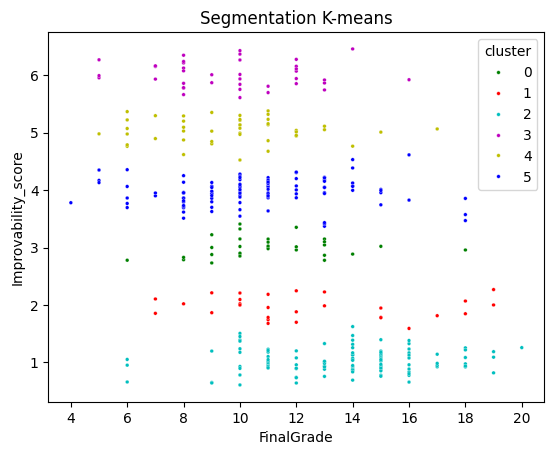

In [323]:
x_axis = df_new['FinalGrade'] 
y_axis = df_new['Improvability_score']
random_offset = np.random.normal(0, 0.2, size=y_axis.shape)  # Décalage léger pour séparer les points

sns.scatterplot(x=x_axis, y=y_axis + random_offset, s = 7, hue=df_new['cluster'], palette=['g', 'r', 'c', 'm', 'y', 'b'])
plt.title("Segmentation K-means")
plt.show()

In [203]:
df_new[['FinalGrade', 'Improvability_score']].to_csv('table_export.csv', index=False)

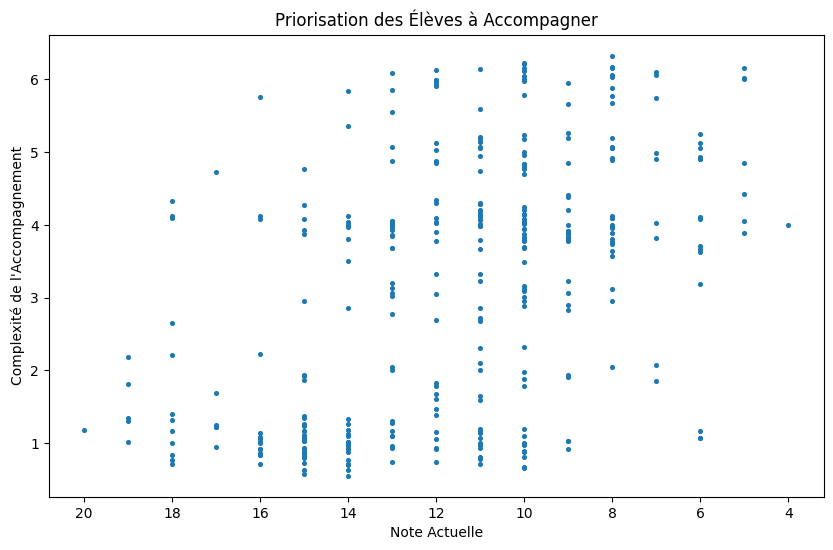

In [316]:
import matplotlib.pyplot as plt
import numpy as np

x = df_new['FinalGrade']
y = df_new['Improvability_score']

# Ajouter un léger décalage aléatoire à la complexité (sur l'axe y) pour éviter la superposition
random_offset = np.random.normal(0, 0.2, size=y.shape)  # Décalage léger pour séparer les points

# Tracer les points avec un léger décalage sur l'axe y, tout en gardant l'échelle de y inchangée
plt.figure(figsize=(10, 6))
plt.scatter(x, y + random_offset, s = 7)  # Diminuer la taille des cercles avec s=20

# Inverser l'axe des X pour un affichage décroissant
plt.gca().invert_xaxis()  

# Ajouter des labels et un titre
plt.xlabel("Note Actuelle")
plt.ylabel("Complexité de l'Accompagnement")
plt.title("Priorisation des Élèves à Accompagner")

# Affichage du graphique
plt.show()


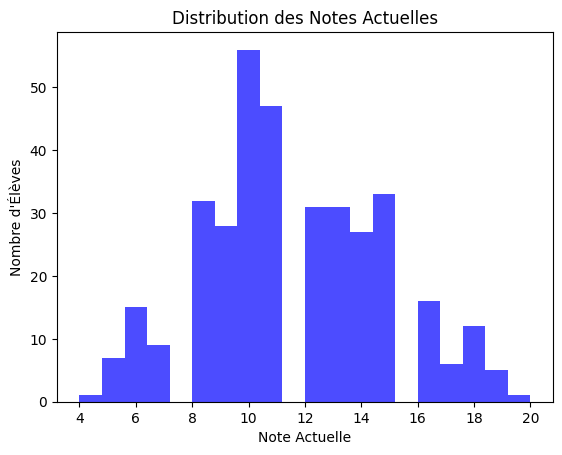

In [317]:
# Afficher la distribution des notes
plt.hist(df_new['FinalGrade'], bins=20, color='blue', alpha=0.7)
plt.xlabel("Note Actuelle")
plt.ylabel("Nombre d'Élèves")
plt.title("Distribution des Notes Actuelles")
plt.show()

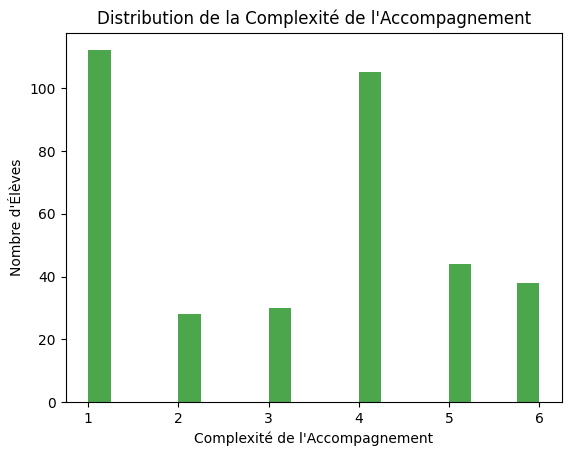

In [318]:
# Distribution des scores de complexité
plt.hist(df_new['Improvability_score'], bins=20, color='green', alpha=0.7)
plt.xlabel("Complexité de l'Accompagnement")
plt.ylabel("Nombre d'Élèves")
plt.title("Distribution de la Complexité de l'Accompagnement")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_37936\3674655341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_new['Improvability_score'], y=df_new['FinalGrade'], palette="Blues")


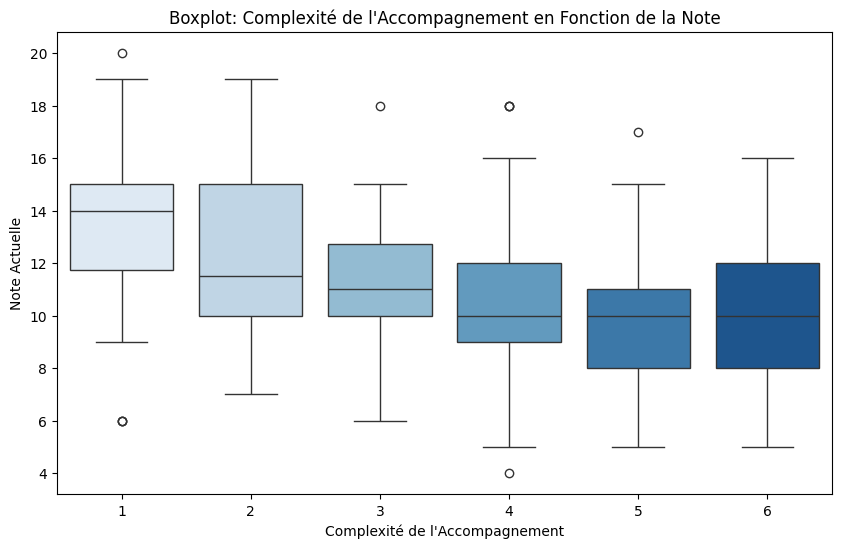

In [319]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_new['Improvability_score'], y=df_new['FinalGrade'], palette="Blues")
plt.xlabel("Complexité de l'Accompagnement")
plt.ylabel("Note Actuelle")
plt.title("Boxplot: Complexité de l'Accompagnement en Fonction de la Note")
plt.show()

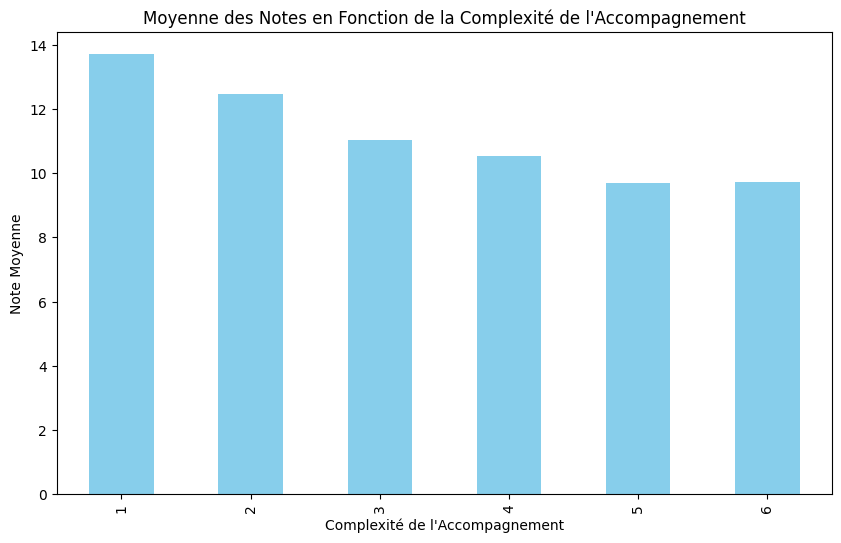

In [320]:
# Calcul de la moyenne des notes pour chaque niveau de complexité
avg_grades_by_complexity = df_new.groupby('Improvability_score')['FinalGrade'].mean()

# Créer le bar plot
plt.figure(figsize=(10, 6))
avg_grades_by_complexity.plot(kind='bar', color='skyblue')
plt.xlabel("Complexité de l'Accompagnement")
plt.ylabel("Note Moyenne")
plt.title("Moyenne des Notes en Fonction de la Complexité de l'Accompagnement")
plt.show()
